# Outliers Detection
### Graphical Indication:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
dataset.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner


In [4]:
dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [5]:
dataset.info()
print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB
(4340, 8)


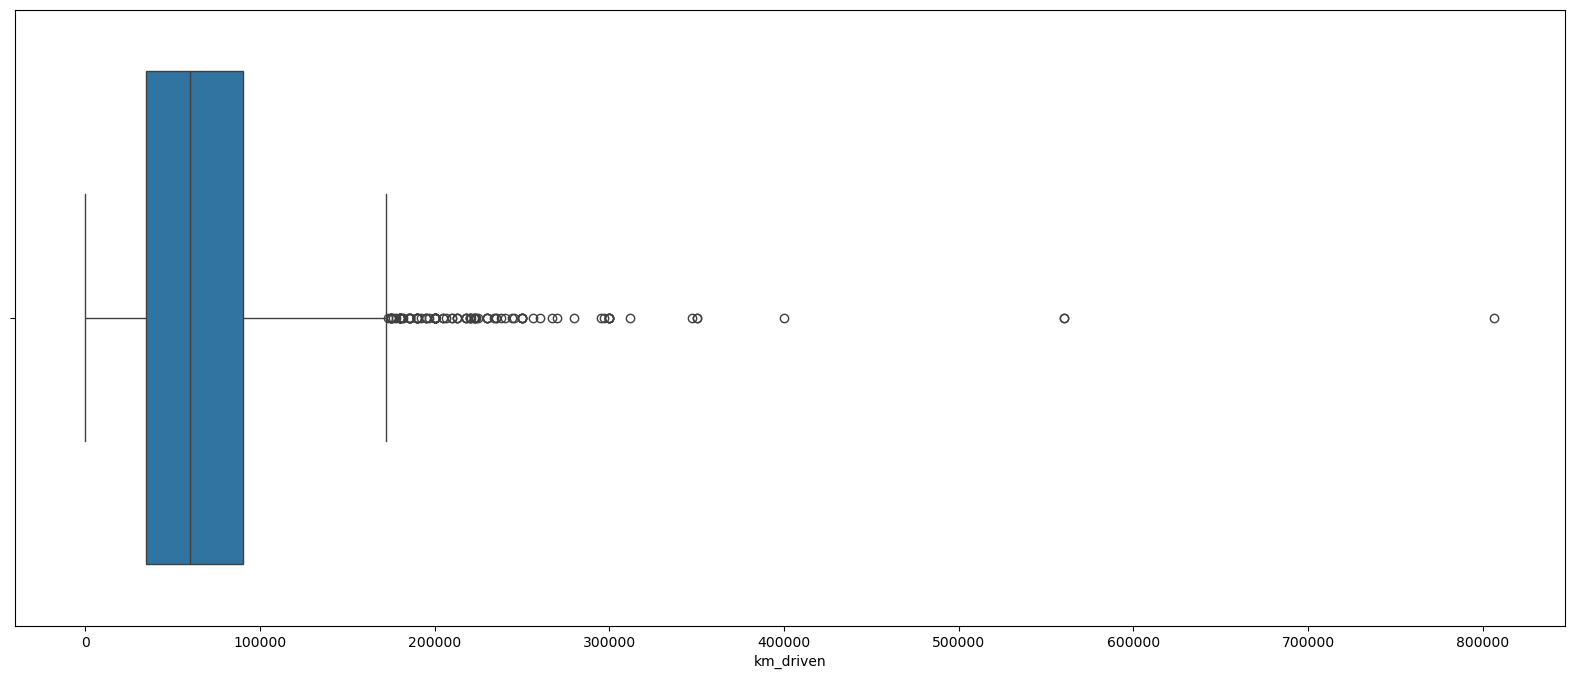

In [22]:
plt.figure(figsize=(20,8))
sns.boxplot(x = "km_driven", data=dataset)
plt.show()

### Outliers Removing through IQR

In [7]:
q1 = dataset["km_driven"].quantile(0.25)
q3 = dataset["km_driven"].quantile(0.75)

In [8]:

IQR = q3 - q1

In [9]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

In [10]:
min_range, max_range

(-47500.0, 172500.0)

In [11]:
new_dataset = dataset[dataset["km_driven"] <= max_range]

In [12]:
print(dataset.shape)
print(new_dataset.shape)

(4340, 8)
(4230, 8)


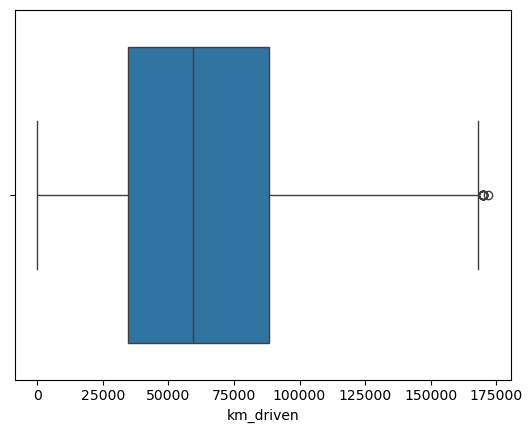

In [13]:
sns.boxplot(x = "km_driven", data=new_dataset)
plt.show()


### Through Z-Score

In [25]:
min_rang = dataset["km_driven"].mean() - (3*dataset["km_driven"].std())
max_rang = dataset["km_driven"].mean() + (3*dataset["km_driven"].std())

In [30]:
# for comparison with the IGR min and max range values w.r.t Z-Score min and max range values 

min_range, max_range

(-47500.0, 172500.0)

In [27]:
min_rang, max_rang

(-73716.52916150766, 206148.08400021732)

In [17]:
n_d = dataset[dataset["km_driven"] <= max_rang]

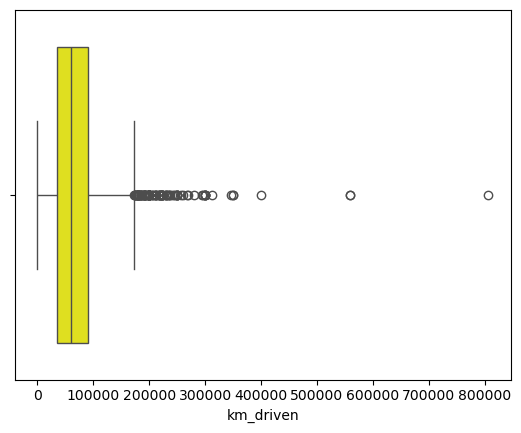

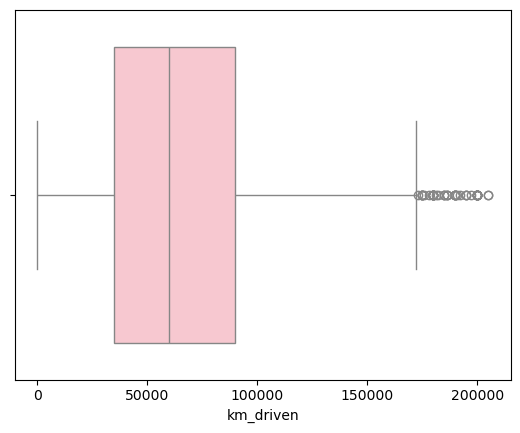

In [35]:
sns.boxplot(x= "km_driven", data=dataset, color = "yellow")
plt.show()
sns.boxplot( x = "km_driven", data=n_d, color = "pink")
plt.show()

In [31]:
# comment: Best outliers removing method is IQR. Because remove almost all outliers.